#Imports –∏ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics import ndcg_score
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/drive')
path = "/drive/MyDrive/DS/Spam_classification"

!mkdir data
!cp -a /$path/. data

Mounted at /drive


In [3]:
train_part = pd.read_csv('data/train_spam.csv')
train_part.head()

text_type                                               text
0       ham  make sure alex knows his birthday is over in f...
1       ham  a resume for john lavorato thanks vince i will...
2      spam  plzz visit my website moviesgodml to get all m...
3      spam  urgent your mobile number has been awarded wit...
4       ham  overview of hr associates analyst project per ...

–¢–∏–ø—ã –∑–Ω–∞—á–µ–Ω–∏–π:

In [4]:
train_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB


–ü–æ—Å–º—Ç–æ—Ä–∏–º –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–æ–±—â–µ–Ω–∏–π, –ø–æ–ø–∞–¥–∞—é—â–∏—Ö –≤ —Å–ø–∞–º, –∏ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö:

In [5]:
train_part['text_type'].value_counts()

text_type
ham     11469
spam     4809
Name: count, dtype: int64

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤—Å—è–∫–∏–π —Å–ª—É—á–∞–π, –µ—Å—Ç—å –ª–∏ Nan-—ã:

In [6]:
train_part.isnull().any()

text_type    False
text         False
dtype: bool

# –ê–Ω–∞–ª–∏–∑ —Å–æ–æ–±—â–µ–Ω–∏–π –∏ –µ–≥–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞(—Å–º –≤ —Ä–∞–∑–¥–µ–ª–µ –ø—Ä–æ –º–æ–¥–µ–ª–∏)

–ó–∞–∫–æ–¥–∏—Ä—É–µ–º target. –ï—Å–ª–∏ —Å–ø–∞–º, —Ç–æ 1, –∏ 0 –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ.

In [21]:
train_part['text_type'] = train_part['text_type'].apply(lambda x: 1 if x == 'spam' else 0)

train_part.head()

text_type                                               text
0          0  make sure alex knows his birthday is over in f...
1          0  a resume for john lavorato thanks vince i will...
2          1  plzz visit my website moviesgodml to get all m...
3          1  urgent your mobile number has been awarded wit...
4          0  overview of hr associates analyst project per ...

–£–±–µ—Ä–µ–º –≤–Ω–∞—á–∞–ª–µ –≤—Å–µ –ª–∏—à–Ω–∏–µ —Ç–∞–±—É–ª—è—Ü–∏–∏:

In [ ]:
clean_data = train_part.copy()

clean_data['text'] = clean_data['text'].apply(lambda x: x.replace('\\n',' ').replace("\t",' ').replace('\\',' '))

–£–±–µ—Ä–µ–º —Å—Ç–æ–ø —Å–ª–æ–≤–∞ –∑–∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º:

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_stopwords(text):
    tokens = word_tokenize(text)
    clean_text = [word.lower() for word in tokens if not (word.lower() in stopword_list) and (len(word) > 2)]
    return clean_text

clean_data['text'] = clean_data['text'].apply(clean_stopwords)

–¢–∞–∫–∂–µ —á—Ç–æ–±—ã –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫–∏–µ —Å–ª–æ–≤–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —á–∞—â–µ –≤—Å–µ–≥–æ, –∏—Å–ø–æ–ª—å–∑—É–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é:

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def text_lemm(text):
    lemm_text = []
    for word in text:
        lemm_text.append(lemmatizer.lemmatize(word))
    return lemm_text

clean_data['text'] = clean_data['text'].apply(text_lemm)

–ü—Å–æ—Ç—Ä–∏–º –Ω–∞ —Ç–µ–∫—Å—Ç —Å–æ–æ–±—â–µ–Ω–∏–π —Ç–µ–ø–µ—Ä—å:

In [ ]:
clean_data.head()

text_type                                               text
0          0  [make, sure, alex, know, birthday, fifteen, mi...
1          0  [resume, john, lavorato, thanks, vince, get, m...
2          1  [plzz, visit, website, moviesgodml, get, movie...
3          1  [urgent, mobile, number, awarded, ¬£2000, prize...
4          0  [overview, associate, analyst, project, per, d...

–í—ã–≤–µ–¥–µ–º —Ç–æ–ø 15 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–∞—Ö:

In [ ]:
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize,sent_tokenize

counnter_words = Counter()

def count_words(words):
    for word in words:
        counnter_words.update({word: 1})

clean_data['text'].apply(count_words)

counnter_words.most_common(15)

[('1635465', 12568),
 ('ect', 5349),
 ('enron', 4848),
 ('vince', 4526),
 ('url', 3924),
 ('not', 3334),
 ('hou', 2663),
 ('kaminski', 2365),
 ('please', 2352),
 ('com', 2331),
 ('get', 2288),
 ('2000', 2253),
 ('subject', 2203),
 ('would', 2036),
 ('time', 2033)]

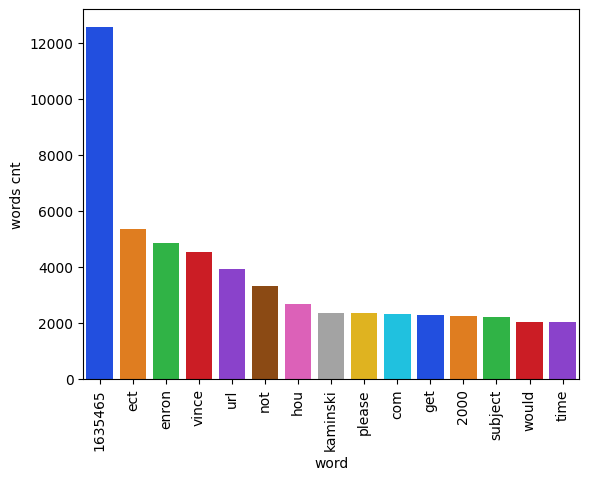

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("tab10")

df=pd.DataFrame(counnter_words.most_common(15), columns=['word', 'words cnt'])

sns.barplot(x=df["word"],y=df["words cnt"], palette='bright')
plt.xticks(rotation=90)
plt.show()

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ —Ç–µ–∫—Å—Ç–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –æ—á–µ–Ω—å —Å—Ç—Ä–∞–Ω–Ω—ã–µ —Å–ª–æ–≤–∞. –¢–∞–∫ —Ç–æ–ø 1 - –Ω–æ–º–µ—Ä 1635465. –¢–∞–∫–∂–µ –≤ —Ç–æ–ø –µ—â–µ –ø–æ–ø–∞–ª–æ —á–∏—Å–ª–æ 2000. –¢–∞–∫ –∂–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤—Å—è–∫–∏–µ —Å–ª—É–∂–µ–±–Ω—ã–µ —Å–ª–æ–≤–∞ –ø–æ —Ç–∏–ø—É com(–≤–µ—Ä–æ—è—Ç–Ω–æ —Å—Å—ã–ª–∫–∏ –Ω–∞ —Å–∞–π—Ç—ã).

–¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –≤ —Å–ø–∞–º —Ç–µ–∫—Å—Ç–∞—Ö:

In [ ]:
counnter_words = Counter()

clean_data[clean_data['text_type'] == 1]['text'].apply(count_words)

counnter_words.most_common(15)

[('1635465', 1568),
 ('free', 1059),
 ('get', 871),
 ('not', 777),
 ('call', 566),
 ('click', 555),
 ('new', 550),
 ('link', 524),
 ('one', 495),
 ('offer', 484),
 ('account', 480),
 ('com', 479),
 ('company', 472),
 ('money', 471),
 ('time', 465)]

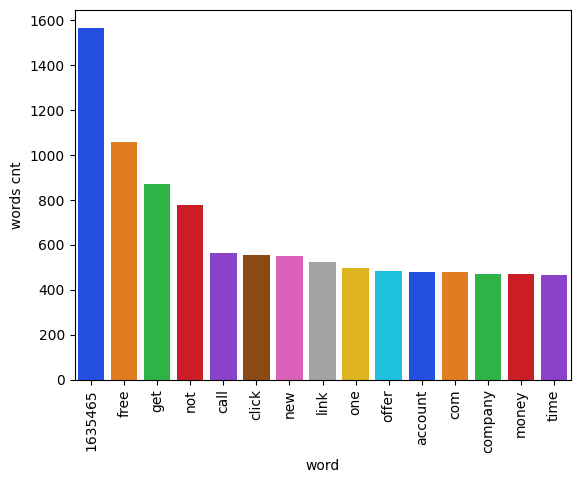

In [ ]:
df=pd.DataFrame(counnter_words.most_common(15), columns=['word', 'words cnt'])

sns.barplot(x=df["word"],y=df["words cnt"], palette='bright')
plt.xticks(rotation=90)
plt.show()

–í–∏–¥–Ω–æ, —á—Ç–æ –º–Ω–æ–≥–∏–µ —Å–ª–æ–≤–∞ –æ—Å—Ç–∞–ª–∏—Å—å —Ç–∞–∫–∏–º–∏ –∂–µ. –ù–æ –ø–æ—è–≤–∏–ª–∏—Å—å —Å–ª–æ–≤–∞ –Ω–∞–ø–æ–¥–æ–±–∏–µ click, link, offer, free. –≠—Ç–∏ —Å–ª–æ–≤–∞ –æ–±—ã—á–Ω–æ –∏ —É–ø–æ—Ç—Ä–µ–±–ª—è—é—Ç—Å—è –≤ —Å–ø–∞–º —Ä–∞—Å—Å—ã–ª–∫–∞—Ö. –¢–∞–∫–∂–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ —á–∏—Å–ª–æ 1635465 –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤—Å–µ–≥–æ 1568 —Ä–∞–∑ –∏–∑ 12568. –ù–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏—è —Å–ø–∞–º–∞ –∏ –Ω–µ —Å–ø–∞–º–∞ –¥—Ä—É–≥–∞—è. –¢–æ –µ—Å—Ç—å –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ —ç—Ç–æ —Å–ª–æ–≤–æ, –≤ —Å—Ä–µ–¥–Ω–µ–º, —á–∞—â–µ –ø–æ—è–≤–ª—è–µ—Ç—Å—è –≤ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Å–æ–æ–±—â–µ–Ω–∏—è—Ö.

–¢–µ–ø–µ—Ä—å –≤ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ç–µ–∫—Å—Ç–∞—Ö:

In [ ]:
counnter_words = Counter()

clean_data[clean_data['text_type'] == 0]['text'].apply(count_words)

counnter_words.most_common(15)

[('1635465', 11000),
 ('ect', 5344),
 ('enron', 4848),
 ('vince', 4525),
 ('url', 3624),
 ('hou', 2660),
 ('not', 2557),
 ('kaminski', 2365),
 ('2000', 2204),
 ('subject', 2114),
 ('please', 1888),
 ('com', 1852),
 ('would', 1849),
 ('time', 1568),
 ('like', 1440)]

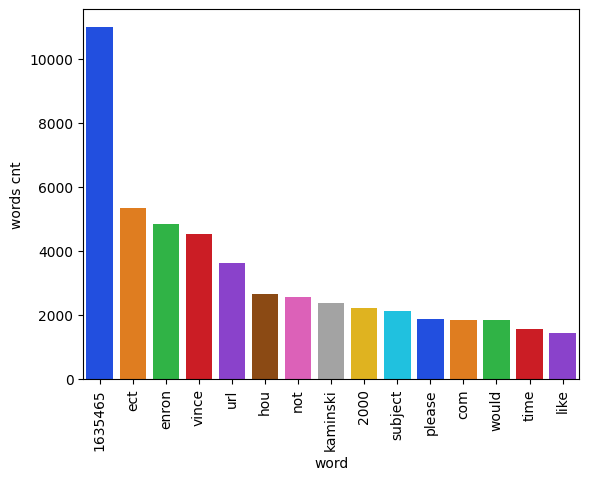

In [ ]:
df=pd.DataFrame(counnter_words.most_common(15), columns=['word', 'words cnt'])

sns.barplot(x=df["word"],y=df["words cnt"], palette='bright')
plt.xticks(rotation=90)
plt.show()

–ó–¥–µ—Å—å —Å–ª–æ–≤–∞ –Ω–µ —Ç–∞–∫–∏–µ –∂–µ, –∫–∞–∫ –∏ –ø—Ä–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ –ø–æ –≤—Å–µ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –¥–ª—è —Å–ø–∞–º —Å–æ–æ–±—â–µ–Ω–∏–π –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–µ —Å–ª–æ–≤–∞ –ø–æ —Ç–∏–ø—É: click, link, offer, free. –¢–æ –µ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ –ø–æ—Å—Ç–æ—Ä–æ–∏—Ç—å –Ω–µ —Ç–æ–ª—å–∫–æ —Å–º—ã—Å–ª–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –Ω–æ –∏ –ø—Ä–æ—Å—Ç–æ –æ—Ä–∏–µ–Ω—Ç–∏—Ä—É—é—â–∏–π—Å—è –Ω–∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–ª–æ–≤–∞. –¢–∞–∫–∂–µ –≤–∞–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –¥–∞—Ç–∞—Å–µ—Ç —Å–ª–µ–≥–∫–∞ —Å—Ç—Ä–∞–Ω–Ω—ã–π. –í –Ω–µ–º —Å–ª–æ–≤–æ —Ç–æ–ø 1 –ø–æ –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ —ç—Ç–æ –Ω–æ–º–µ—Ä. –¢–∞–∫–∂–µ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–æ–±—â–µ–Ω–∏—è—Ö –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –æ—á–µ–Ω—å –º–Ω–æ–≥–æ —ç–º–æ–¥–∑–∏. –ü–æ—ç—Ç–æ–º—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–≥—É—Ç –ø–æ–ª—É—á–∏—Ç—å—Å—è –Ω–µ —Å–∞–º—ã–µ —Ö–æ—Ä–æ—à–∏–µ.

# –ú–æ–¥–µ–ª–∏

–ü–æ–ø—Ä–æ–±—É–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–¥—Ö–æ–¥–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏:

1) –° –ø–æ–º–æ—â—å—é –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–æ–≤–æ–¥–∏–ª–∞—Å—å –≤ –∞–Ω–∞–ª–∏–∑–µ —Å–æ–æ–±—â–µ–Ω–∏–π, –∏ CountVectorizer –ø–æ–ª—É—á–∏–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ –≤–µ–∫—Ç–æ—Ä(–∫–∞–∂–¥—ã–π —ç–µ–ª–µ–º–µ–Ω—Ç - —á–∏—Å–ª–æ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ —Å–ª–æ–≤–∞ –≤ –Ω–µ–º). –î–∞–ª–µ–µ –æ–±—É—á–∏–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã –Ω–∞ —ç—Ç–æ–º –≤—Ö–æ–¥–µ.

2) –ë—É–¥–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —ç–º–±—ç–¥–¥–∏–Ω–≥–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ —É—á–∏—Ç—ã–≤–∞—é—Ç –∫–æ–Ω—Ç–µ–∫—Å—Ç. –î–∞–ª—å—à–µ –±—É–¥–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —ç—Ç–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏.

## –ü–µ—Ä–≤—ã–π –ø–æ–¥—Ö–æ–¥

–í–Ω–∞—á–∞–ª–µ –ø–æ—Å—Ç—Ä–æ–∏–º –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –≥–¥–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –≤ —Ç–µ–∫—Å—Ç–µ –±—É–¥–µ—Ç —É–∫–∞–∑–∞–Ω–∞ –µ–≥–æ —á–∞—Å—Ç–æ—Ç–∞ –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(analyzer=lambda x: x)

bow = count_vec.fit_transform(clean_data['text']).toarray()

new_data = pd.DataFrame(bow, columns=count_vec.get_feature_names_out())
new_data.head()

+1201  +12139806811  +12292342098  +447441465743  +447706669718  +600  \
0      0             0             0              0              0     0   
1      0             0             0              0              0     0   
2      0             0             0              0              0     0   
3      0             0             0              0              0     0   
4      0             0             0              0              0     0   

   +800uc  +91  +mkv  -30  ...  ü•∫ü•∫ü•∫  ü¶æits  üßëüèª‚Äçüíª  üßßüßßall  üßßüßßüßßüßßüßßüßß  üß®üß®üéÉüéÉ  üß¨…¥·¥Ä·¥õ·¥ú Ä·¥á  \
0       0    0     0    0  ...    0     0     0      0       0     0        0   
1       0    0     0    0  ...    0     0     0      0       0     0        0   
2       0    0     0    0  ...    0     0     0      0       0     0        0   
3       0    0     0    0  ...    0     0     0      0       0     0        0   
4       0    0     0    0  ...    0     0     0      0       0     0        0   

   üß≠now  ü™Ñü™Ñü™Ñü™Ñü™Ñü™Ñü™Ñü™Ñü™Ñ  ü™ôü™ôü™ôü™ôü™ôü™ôü™ôü™ô  
0     0          0         0  
1     0          0         0  
2     0          0         0  
3     0          0         0  
4     0          0         0  

[5 rows x 51974 columns]

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ —Å—é–¥–∞ –ø–æ–ø–∞–ª–∏ –Ω–æ–º–µ—Ä–∞ –∏ —ç–º–æ–¥–∑–∏. –ï—Å—Ç—å –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ –æ–Ω–∏ —Ç–æ–∂–µ –º–æ–≥—É—Ç –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å —Å–ø–∞–º, —Ç–∞–∫ –∫–∞–∫ –≤ –æ–±—ã—á–Ω–æ–π –ø–µ—Ä–µ–ø–∏—Å–∫–µ –ª—é–¥–∏ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Å—Ç–æ–ª—å–∫–æ —ç–º–æ–¥–∑–∏.

–†–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ train –∏ test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_data, clean_data['text_type'], test_size=0.2, stratify=clean_data['text_type'])

print('Train size: ', len(X_train))
print('Test size: ', len(X_test))

Train size:  13022
Test size:  3256


### –ë–∞–π–µ—Å–æ–≤—Å–∫–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è.

–¢–∞–∫ –∫–∞–∫ –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –º—ã –≤—ã—è—ã–∏–ª–∏ —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —á–∞—â–µ –≤—Å–µ–≥–æ –≤ —Å–ø–∞–º–µ, —Ç–æ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ë–∞–π–µ—Å–æ–≤—Å–∫—É—é –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

MultinomialNB()

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:

In [ ]:
y_pred = mnb.predict(X_test)

–ü–æ—Å—Ç—á–∏—Ç–∞–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∫ ROC AUC:

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def print_classification_score(y_true, y_pred):
    print("Accuracy: ",  accuracy_score(y_true, y_pred))
    print("Recall metric: ",  recall_score(y_true, y_pred, average='binary'))
    print("F1 Score: ", f1_score(y_true, y_pred, average='binary'))

In [ ]:
print_classification_score(y_test, y_pred)

Accuracy:  0.9164619164619164
Recall metric:  0.9345114345114345
F1 Score:  0.8685990338164251


–ü–æ—Å—á–∏—Ç–∞–µ–º ROC AUC. –î–ª—è —ç—Ç–æ–≥–æ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –≤–µ—Ä–Ω–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å(predict_proba(X)).

In [ ]:
from sklearn.metrics import roc_auc_score

y_pob = mnb.predict_proba(X_test)[:, 1]
print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.972584632785156


### –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

–î–∞–ª–µ–µ –Ω–µ –±—É–¥–µ–º –≤—ã–≤–æ–¥–∏—Ç—å –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, —Ç–∞–∫ –∫–∞–∫ –Ω–∞ GPU –æ–Ω–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–æ–µ.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train[:6000], y_train[:6000])

LogisticRegression()

–ü–æ—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏:

In [ ]:
y_pred = clf.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.9284398034398035
Recall metric:  0.817047817047817
F1 Score:  0.8709141274238228


–í—ã–≤–µ–¥–µ–º ROC AUC:

In [ ]:
y_pob = clf.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9719375501851526


### SVM

In [ ]:
from sklearn import svm

C_value = 0.1
svc = svm.SVC(C=C_value, kernel='linear', random_state=42, probability=True)

svc.fit(X_train, y_train)

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:

In [ ]:
y_pred = svc.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.9175398636398236
Recall metric:  0.907057312048317
F1 Score:  0.8718151773938928


–ü–æ—Å—á–∏—Ç–∞–µ–º ROC AUC:

In [ ]:
y_pob = svc.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9701355708391936


### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)

xgb.fit(X_train[:3600], y_train[:3600])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:

In [ ]:
y_pred = xgb.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.8986486486486487
Recall metric:  0.7515592515592515
F1 Score:  0.8141891891891891


–í—ã–≤–µ–¥–µ–º ROC AUC:

In [ ]:
y_pob = xgb.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9536542947615311


### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier()

cls.fit(X_train, y_train)

RandomForestClassifier()

–ú–µ—Ç—Ä–∏–∫–∏ –≤ —ç—Ç–æ–º –ø–æ–¥—Ö–æ–¥–µ:

In [ ]:
y_pred = cls.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.9093980343980343
Recall metric:  0.7203742203742204
F1 Score:  0.8245092207019631


ROC AUC –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ:

In [ ]:
y_pob = cls.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9710620854910305


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç—Ç–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞:

| model_name    | MultinomialNB | LogisticRegression | SVM    | XGBClassifier | Random Forest Classifier |
|---------------|---------------|--------------------|--------|---------------|--------------------------|
| ROC AUC score | 0.9726        | 0.9719             | 0.9701 | 0.9537        | 0.9711                  |

–í–∏–¥–Ω–æ, —á—Ç–æ XGB —Å–ø—Ä–∞–≤–∏–ª—Å—è —Å–æ —Å–≤–æ–µ–π –∑–∞–¥–∞—á–µ–π –ª—É—á—à–µ –≤—Å–µ—Ö. –ü—Ä–∏ —ç—Ç–æ –ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –Ω–µ —Å–∏–ª—å–Ω–æ —Ö—É–∂–µ(—Ä–∞–∑–Ω–∏—Ü–∞ –≤ 0.0011). –¢–æ –µ—Å—Ç—å –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–µ –¥–ª—è —Å–ø–∞–º–∞ —Å–ª–æ–≤–∞ –ø–æ–º–æ–≥–∞—é—Ç —Ä–∞–±–æ—Ç–µ –ë–∞–π–µ—Å–æ–≤—Å–∫–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞.

## –í—Ç–æ—Ä–æ–π –ø–æ–¥—Ö–æ–¥

–í –∫–∞—á–µ—Å—Ç–≤–µ –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω–æ–π –º–æ–¥–µ–ª–∏ –≤–æ–∑—å–º–µ–º BERT. –ü—Ä–∏–∑–Ω–∞–∫–∏ –±—É–¥–µ–º –¥–æ—Å—Ç–∞–≤–∞—Ç—å –¥–≤—É–º—è —Å–ø–æ—Å–æ–±–∞–º–∏:

1) –í–æ–∑—å–º–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–µ 4 hidden layers –∏ —É—Å—Ä–µ–¥–Ω–∏–º –∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è.

2) –í–æ–∑—å–º–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–π —Å–ª–æ–π(pooler).

### First Feature Extractor

In [7]:
from transformers import BertModel, BertTokenizer
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True).to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [22]:
def extract_features(text):
    input_ids = torch.tensor([tokenizer.encode(text, padding=True, truncation=True,max_length=50, add_special_tokens = True)]).to(device)

    with torch.no_grad():
        outputs = model(input_ids)
        hidden_states = outputs[2]

    token_vecs = []
    for layer in range(-4, 0):
        token_vecs.append(hidden_states[layer][0])

    features = []
    for token in token_vecs:
        features.append(torch.mean(token, dim=0))
    return torch.stack(features).cpu()

–î–æ—Å—Ç–∞–Ω–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏:

In [23]:
import datetime

features = []

start = datetime.datetime.now()
for i in range(len(train_part)):
    features.append(extract_features(train_part.iloc[i]["text"]))
print("Time passed: " + str(datetime.datetime.now()-start))

features = torch.cat(features).numpy()

Time passed: 0:03:30.258595


–°–æ—Ö—Ä–∞–Ω–∏–º –∏—Ö –Ω–∞ –≤—Å—è–∫–∏–π —Å–ª—É—á–∞–π:

In [ ]:
np.save("text_bert_features.npy", features)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–∑–º–µ—Ä target-–∞ –∏ –ø–∏—Ä–∑–Ω–∞–∫–æ–≤:

In [24]:
labels = train_part['text_type'].values

features.shape, labels.shape

((65112, 768), (16278,))

–ò–∑–º–µ–Ω–∏–º —Ä–∞–∑–º–µ—Ä—ã, —á—Ç–æ–±—ã –∏—Ö –¥–ª–∏–Ω–∞ –±—ã–ª–∞ –æ–¥–∏–Ω–∞–∫–æ–≤–∞—è:

In [25]:
features_reshaped = features.reshape((len(train_part), -1))

data = np.hstack((features_reshaped, labels.reshape((-1, 1))))

–†–∞–∑–¥–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ 2 —á–∞—Å—Ç–∏(—á—Ç–æ–±—ã –±—ã–ª –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ —Å–ª–æ–≤–∞—Ä—å, —ç—Ç–æ –Ω–∞–¥–æ –¥–µ–ª–∞—Ç—å –ø–æ—Å–ª–µ –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤).

In [26]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [27]:
print("Train data size: ", len(X_train))
print("Test data size: ", len(X_test))

Train data size:  13022
Test data size:  3256


–¢–µ–ø–µ—Ä—å –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º —ç—Ç–∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –∏ —Å—Ä–∞–≤–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞—Ö(–ë–∞–π–µ—Å–æ–≤—Å–∫–∏–π –∑–¥–µ—Å—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ –ø–æ–ª—É—á–∏—Ç—Å—è, –∞ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –æ—Å—Ç–∞–≤–∏–º).

#### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def print_classification_score(y_true, y_pred):
    print("Accuracy: ",  accuracy_score(y_true, y_pred))
    print("Recall metric: ",  recall_score(y_true, y_pred, average='binary'))
    print("F1 Score: ", f1_score(y_true, y_pred, average='binary'))

In [ ]:
print_classification_score(y_test, y_pred)

Accuracy:  0.9505528255528255
Recall metric:  0.9090909090909091
F1 Score:  0.9134873723804406


In [ ]:
from sklearn.metrics import roc_auc_score

y_pob = clf.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9855760125522145


#### SVM


In [ ]:
from sklearn import svm

C_value = 0.1
svc = svm.SVC(C=C_value, kernel='linear', random_state=42, probability=True)

svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [ ]:
y_pred = svc.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.949017199017199
Recall metric:  0.9048128342245989
F1 Score:  0.9106566200215285


In [ ]:
y_pob = svc.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9845922027892274


#### XGBoost

In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)

In [28]:
start = datetime.datetime.now()
xgb.fit(X_train, y_train)
print("Time passed: " + str(datetime.datetime.now()-start))

Time passed: 0:01:48.235215


In [ ]:
y_pred = xgb.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.9502457002457002
Recall metric:  0.8877005347593583
F1 Score:  0.9110867178924259


In [ ]:
y_pob = xgb.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9876772643176576


#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier()

In [ ]:
start = datetime.datetime.now()
cls.fit(X_train, y_train)
print("Time passed: " + str(datetime.datetime.now()-start))

Time passed: 0:01:35.734578


In [ ]:
y_pred = cls.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.9296683046683046
Recall metric:  0.7967914438502673
F1 Score:  0.866783013379872


In [ ]:
y_pob = cls.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9803302559518187


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç—Ç–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞:

| model_name    | LogisticRegression | SVM    | XGBClassifier | Random Forest Classifier |
|---------------|--------------------|--------|---------------|--------------------------|
| ROC AUC score | 0.9856             | 0.9846 | 0.9877        | 0.9803                   |

–í —Ü–µ–ª–æ–º, —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –∏–∑–≤–ª–µ–∫–∞—é—Ç—Å—è, –∏—Å–ø–æ–ª—å–∑—É—è –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—É—é –º–æ–¥–µ–ª—å, –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ–ª—É—á–∞–µ—Ç—Å—è —Ç–æ—á–Ω–µ–µ. –ü—Ä–∏—á–µ–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞—Ö –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –Ω–µ —Ç–∞–∫ —Å–∏–ª—å–Ω–æ.

### Second Feature Extractor

–í—ã–≤–µ–¥–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏. –í–∏–¥–Ω–æ, —á—Ç–æ –ø–æ—Å–ª–µ–¥–Ω–∏–π —Å–ª–æ–π - pooler. –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥–∞–≤–∞—Ç—å –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–æ–ª—å–∫–æ –µ–≥–æ.

In [53]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

–í—ã—Ç–∞—â–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏:

In [54]:
def extract_features_pooler(text):
    text = text.lower()
    input_ids = torch.tensor([tokenizer.encode(text, padding=True, truncation=True,max_length=50, add_special_tokens = True)]).to(device)

    with torch.no_grad():
        outputs = model(input_ids)
        hidden_states = outputs['pooler_output']

    return hidden_states.cpu()

In [55]:
features = []

start = datetime.datetime.now()
for i in range(len(train_part)):
    features.append(extract_features_pooler(train_part.iloc[i]["text"]))
print("Time passed: " + str(datetime.datetime.now()-start))

features = torch.cat(features).numpy()

Time passed: 0:03:20.776068


–°–æ—Ö—Ä–∞–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏:

In [ ]:
np.save("text_bert_features_pooler.npy", features)

–†–∞–∑–º–µ—Ä—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ target-–∞ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ:

In [56]:
labels = train_part['text_type'].values

features.shape, labels.shape

((16278, 768), (16278,))

–†–∞–∑–¥–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ train –∏ test:

In [57]:
data = np.hstack((features, labels.reshape((-1, 1))))

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [58]:
print("Train data size: ", len(X_train))
print("Test data size: ", len(X_test))

Train data size:  13022
Test data size:  3256


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–æ–ª—É—á–∏–≤—à–∏–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫:

#### XGBoost

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º –≤–Ω–∞—á–∞–ª–µ –Ω–∞ XGBoost, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –¥–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ª—É—á—à–µ –Ω–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–∞—Ö(—Å–º–æ—Ç—Ä–∏ –≤—ã—à–µ).

In [59]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å:

In [60]:
start = datetime.datetime.now()
xgb.fit(X_train, y_train)
print("Time passed: " + str(datetime.datetime.now()-start))

Time passed: 0:00:27.936350


–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏:

In [63]:
y_pred = xgb.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.9195331695331695
Recall metric:  0.8085561497326204
F1 Score:  0.8523111612175874


ROC AUC –º–µ—Ç—Ä–∏–∫–∞:

In [65]:
y_pob = xgb.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.967366546320851


#### –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [68]:
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –∏—Å–ø–æ–ª—å–∑—É—è –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é:

In [69]:
y_pred = clf.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.9342751842751843
Recall metric:  0.8652406417112299
F1 Score:  0.8831877729257642


ROC AUC –º–µ—Ç—Ä–∏–∫–∞:

In [71]:
y_pob = clf.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9734122531547577


#### SVM

In [74]:
C_value = 0.1
svc = svm.SVC(C=C_value, kernel='linear', random_state=42, probability=True)

svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏:

In [75]:
y_pred = svc.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.9315110565110565
Recall metric:  0.8481283422459893
F1 Score:  0.8767274737423992


ROC AUC score:

In [76]:
y_pob = svc.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9703831789266567


#### RandomForest

In [79]:
cls = RandomForestClassifier()

cls.fit(X_train, y_train)

RandomForestClassifier()

–ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ç–∞–∫–∂–µ –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞:

In [80]:
y_pred = cls.predict(X_test)

print_classification_score(y_test, y_pred)

Accuracy:  0.875
Recall metric:  0.627807486631016
F1 Score:  0.7425679949399114


–ò –ø–æ–ª—É—á–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ ROC AUC –Ω–∞ –Ω–µ–º:

In [81]:
y_pob = cls.predict_proba(X_test)[:, 1]

print("ROC AUC score: ", roc_auc_score(y_test, y_pob, average=None))

ROC AUC score:  0.9415865833231574


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–∞–±–æ—Ç—ã:

| model_name    | LogisticRegression | SVM    | XGBClassifier | Random Forest Classifier |
|---------------|--------------------|--------|---------------|--------------------------|
| ROC AUC score | 0.9734             | 0.9704 | 0.9674        | 0.9415                   |

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –Ω–∞ —Ç–∞–∫–∏—Ö –≤–µ–∫—Ç–æ—Ä–∞—Ö –º–æ–¥–µ–ª–∏ —Ä–∞–±–æ—Ç–∞—é—Ç —Ö—É–∂–µ. –¢–∞–∫–∂–µ —Å—Ç–æ–∏—Ç –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–∞–µ—Ç –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è. –ê XGBoost —Ä–∞–±–æ—Ç–∞–µ—Ç —Ö—É–∂–µ.

# –¢–µ–ø–µ—Ä—å –ø—Ä–µ–¥—Å–∫–∞–∂–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ —Ñ–∞–π–ª–∞:

In [29]:
test = pd.read_csv('data/test_spam.csv')
test.head()

text
0  j jim whitehead ejw cse ucsc edu writes j you ...
1  original message from bitbitch magnesium net p...
2  java for managers vince durasoft who just taug...
3               there is a youtuber name saiman says
4  underpriced issue with high return on equity t...

–ò–∑–≤–ª–µ—á–µ–º —ç–º–±–µ–¥–¥–∏–Ω–≥–∏, –∏—Å–ø–æ–ª—å–∑—É—è —Ç—É –∂–µ –º–æ–¥–µ–ª—å:

In [30]:
import datetime

features_test = []

start = datetime.datetime.now()
for i in range(len(test)):
    features_test.append(extract_features(test.iloc[i]["text"]))
print("Time passed: " + str(datetime.datetime.now()-start))

features_test = torch.cat(features_test).numpy()

Time passed: 0:00:56.209210


–ü–æ–¥–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:

In [32]:
features_reshaped = features_test.reshape((len(test), -1))
features_reshaped.shape

(4070, 3072)

–ü—Ä–µ–¥—Å–∫–∞–∂–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ predict_proba. –¢–æ –µ—Å—Ç—å –ø–æ —Å—É—Ç–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –ø–∏—Å—å–º–∞ –∫ —Å–ø–∞–º—É. –¢–∞–∫ –∫–∞–∫ —É —Å–ø–∞–º–∞ traget=1.

In [50]:
y_prob = xgb.predict_proba(features_reshaped)[:, 1]
len(y_prob)

4070

–î–æ–±–∞–≤–∏–º –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º:

In [51]:
test['score'] = y_prob.tolist()
test.head()

text     score
0  j jim whitehead ejw cse ucsc edu writes j you ...  0.000090
1  original message from bitbitch magnesium net p...  0.135144
2  java for managers vince durasoft who just taug...  0.002002
3               there is a youtuber name saiman says  0.000073
4  underpriced issue with high return on equity t...  0.994698

–°–æ—Ö—Ä–∞–Ω–∏–º csv —Ñ–∞–π–ª:

In [52]:
test.to_csv('test.csv', index=False)

–û–ø—Ä–æ–±–æ–≤–∞–≤ —Ä–∞–∑–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã, –º–æ–∂–Ω–æ —Å–∫–∑–∞–∞—Ç—å —á—Ç–æ –ø–æ–¥—Ö–æ–¥ —Å –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é BERT –∏ –ø–æ—Å–ª–µ–¥—É—é—â–µ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º XGBoost –¥–∞–µ—Ç –ª—É—á—à–∏–π –ø–æ ROC AUC —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ù–æ –≤ —Ü–µ–ª–æ–º –∏ –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã –æ—Ç—Å—Ç–∞—é—Ç –Ω–µ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ.